In [1]:
# Author Mohammad Ghadban 

In [2]:
#importing the libraries 

import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
import os
import youtube_dl

In [3]:
#input the youtube video link you want to download
print('Please insert Youtube link')
link = input('')

Please insert Youtube link
https://www.youtube.com/watch?v=z1GCnycbMeA


In [4]:
# Downloading the youtube video as an mp3 file 
ydl_opts = {
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([link])

[youtube] z1GCnycbMeA: Downloading webpage
[youtube] z1GCnycbMeA: Downloading video info webpage


[download] Destination: What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.f137.mp4
[download] 100% of 40.50MiB in 00:0144MiB/s ETA 00:00known ETA
[download] Destination: What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.f251.webm
[download] 100% of 4.75MiB in 00:0042MiB/s ETA 00:009
[ffmpeg] Merging formats into "What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.mkv"
Deleting original file What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.f137.mp4 (pass -k to keep)
Deleting original file What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.f251.webm (pass -k to keep)
[ffmpeg] Destination: What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.mp3
Deleting original file What can Schrödinger's cat teach us about quantum mechanics - Josh Samani-z1GCnycbMeA.mkv (pass -k to keep)


In [5]:
# Remember to install ffmpeg, a complete, cross-platform solution to record, convert and stream audio and video. 

#The audio is set to mono, 8000 hz.
!ffmpeg -i Schrödingers-cat-Josh.mp3 -acodec pcm_s16le -ac 1 -ar 8000 ./mono.wav

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [6]:
#changing the tempo of the file can help for better transcription 
!ffmpeg -i mono.wav -filter:a "atempo=0.9" -vn ./mono09.wav

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [7]:
#listen to the audio file
Audio('mono09.wav')

In [8]:
# Here we chunk the file to 10 sekunds per chunk
!ffmpeg -i mono09.wav -f segment -segment_time 10 -c copy chunks/m%02d.wav

ffmpeg version 3.4.4-0ubuntu0.18.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [9]:
# Transcription is done with awesome SpeechRecognizer
import speech_recognition as sr


audio = sr.AudioFile('chunks/m02.wav')
r = sr.Recognizer()
with audio as source:
    audio = r.record(source)

print('This is an example:\n\n{}'.format(r.recognize_google(audio, language = "en-UK"))) #choose the correct lang.


This is an example:

then it'll come back down and then in your hand again of course that's what happens and you know this because you have witnessed events like this countless times you've been


In [11]:
'''
Next we are going to sort the file and append it to the list. We then make the list into string 
so we can store all atonce in a text file.  
'''

import glob

path = sorted(glob.glob('chunks/*.wav')) #importent to sort the file

text = []

i = 0
for p in path:
    audio = sr.AudioFile(p)
    r = sr.Recognizer()
    with audio as source:
        audio = r.record(source)
        i += 1
        if i >=0 :
            try:
                print(r.recognize_google(audio, language = "en-UK"))
            
                #we append into text list
                text.append(r.recognize_google(audio, language ='en-UK'))
            
                #we make the list into string so we can store all at
                #once in a text file
                textstring   = '.'.join(str(t) for t in text) 
            
                #we create a text file
                file = open('Schröders-cat.txt', 'w')
            
                #we write the converted list to string 
                file.write(textstring)         
                file.close()  
                #print()
                #continue
            except sr.UnknownValueError:
                print("\n\nTranscription Completed")
        
print('\n\n\nAuthor: Mohammas Ghadban')             

consider throwing a ball
into the air can you predict the motion of the ball after it leaves your hand sure that's easy the ball will move abroad until it gets to some highest point
then it'll come back down and then in your hand again of course that's what happens and you know this because you have witnessed events like this countless times you've been
serving the physics of everyday phenomena your entire life but suppose we explore question about the physics of atoms like
what does the motion of an electron around the nucleus of a hydrogen atom look like could we answer that question based on our experience with everyday physics
why because the physics that governs the behaviour of systems at such small scales is much different than the physics of the Mack
objects you see around you all the time the everyday world you know when Love behaves according to the laws of classical mechanics
but systems on the scale of atoms behave according to the laws of quantum mechanics this quantum wor

# Making a map from Wordcloud

In [12]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
#  Reads ‘.txt’ file 
sample = open("Schröders-cat.txt", "r") 
s = sample.read() 

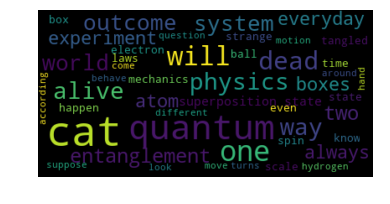

In [15]:
wordcloud = WordCloud(max_font_size=50, min_font_size=10).generate(s)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
##################################################################################################
#Thank you and good luck with what you are doing :) 
##################################################################################################